# Advanced Seaborn for Statistical Plots

You have a dataset with patient age, disease severity score, and response to treatment (binary: 'Responder' / 'Non-Responder'). Describe how you would use a Seaborn scatter plot (or another suitable Seaborn plot) to visualize the relationship between age and severity score, differentiating responders from non-responders.

## Mock up data

This dataset will be entirely synthetic, generated for demonstration purposes.

In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Number of patients
num_patients = 200

# 1. Patient Age (e.g., ranging from 20 to 80 years)
patient_age = np.random.randint(20, 81, num_patients)

# 2. Disease Severity Score (e.g., ranging from 0 to 100)
# Let's make it slightly inversely correlated with age for a bit of realism, but add noise
disease_severity_score = np.clip(100 - (patient_age * 0.8) + np.random.normal(0, 15, num_patients), 0, 100)
disease_severity_score = np.round(disease_severity_score, 1) # Keep one decimal for scores

# 3. Response to Treatment (Binary: 'Responder' / 'Non-Responder')
# Let's make the probability of being a 'Responder' dependent on age and severity:
# Younger and less severe patients are more likely to respond.
# We'll use a logistic function to get probabilities, then randomly assign based on that.

# Calculate a 'response probability' based on age and severity
# Inverse age term: older = lower chance of response
# Inverse severity term: higher severity = lower chance of response
response_probability = 1 / (1 + np.exp(-( (80 - patient_age) / 20 + (50 - disease_severity_score) / 25 - 1.5 )))

# Assign response based on probability
response_to_treatment = np.random.rand(num_patients) < response_probability
response_to_treatment = np.where(response_to_treatment, 'Responder', 'Non-Responder')

# Create the DataFrame
df_patient_data = pd.DataFrame({
    'patient_id': [f'P{i+1:03d}' for i in range(num_patients)],
    'patient_age': patient_age,
    'disease_severity_score': disease_severity_score,
    'response_to_treatment': response_to_treatment
})

# Display the first few rows of the mocked dataset
print("Mocked Patient Data:")
print(df_patient_data.head())

# Display basic info and summary statistics
print("\nDataFrame Info:")
df_patient_data.info()

print("\nDescriptive Statistics:")
print(df_patient_data.describe())

print("\nResponse to Treatment Counts:")
print(df_patient_data['response_to_treatment'].value_counts())

Mocked Patient Data:
  patient_id  patient_age  disease_severity_score response_to_treatment
0       P001           58                    77.9         Non-Responder
1       P002           71                    55.6         Non-Responder
2       P003           48                    66.0         Non-Responder
3       P004           34                    86.2         Non-Responder
4       P005           62                    41.2             Responder

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient_id              200 non-null    object 
 1   patient_age             200 non-null    int64  
 2   disease_severity_score  200 non-null    float64
 3   response_to_treatment   200 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB

Descriptive Statistics:
       patient_age  d

In [2]:
import seaborn as sns

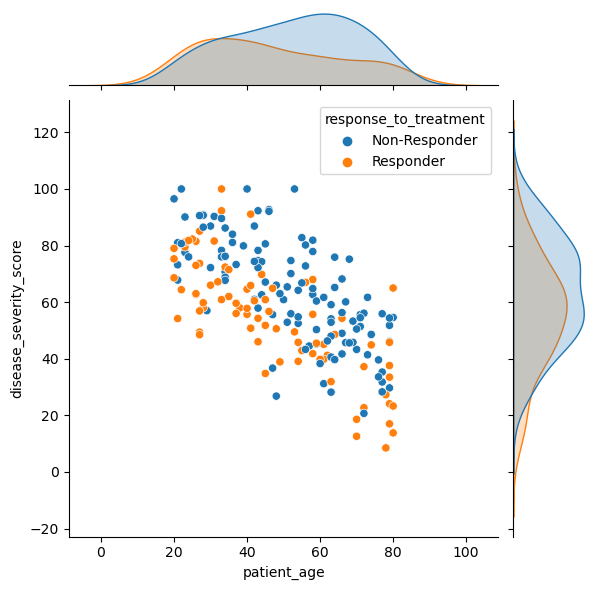

In [6]:
sns.jointplot("patient_age", "disease_severity_score",
              data=df_patient_data,
              hue="response_to_treatment")

In [8]:
df_patient_data["patient_age_dec"] = 10*(df_patient_data["patient_age"]//10)

In [9]:
df_patient_data["patient_age_dec"]

0      50
1      70
2      40
3      30
4      60
       ..
195    40
196    50
197    60
198    30
199    60
Name: patient_age_dec, Length: 200, dtype: int64

/Users/thienhuongvu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/thienhuongvu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


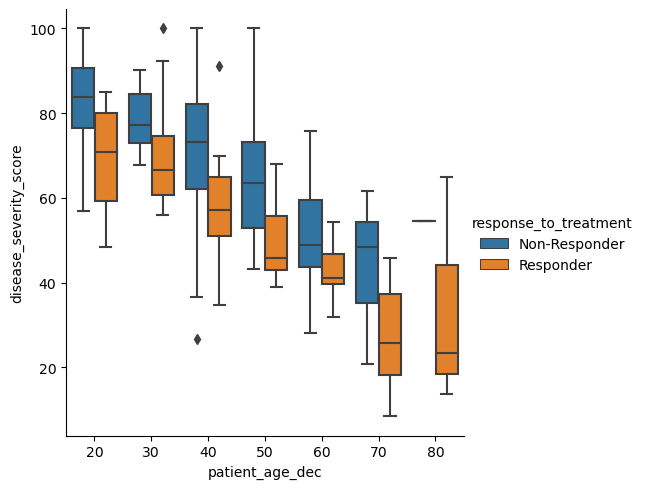

In [13]:
with sns.axes_style(style=None):
    sns.factorplot("patient_age_dec",
                "disease_severity_score", 
                "response_to_treatment",
                data=df_patient_data,
                kind="box")

/Users/thienhuongvu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='patient_age_dec', ylabel='disease_severity_score'>

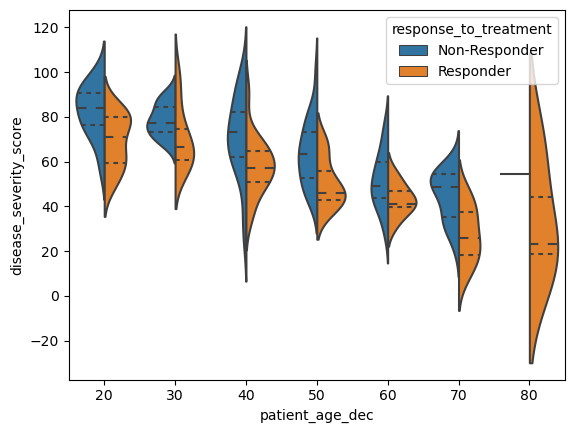

In [16]:
sns.violinplot("patient_age_dec",
                "disease_severity_score", 
                hue="response_to_treatment",
                data=df_patient_data,
                split=True,
                inner="quartile")

We could see that:
* disease severity score is inversely correlated with age
* responders report a lower disease severity across all age groups